In [8]:
from impact_score.model.lgbm_model import ValorantLGBM, get_trained_model_from_csv
from impact_score.model.model_improvement.shap_query import query_shap_situation
import lightgbm

from pathlib import Path
import os
import pandas as pd
import shap

vm = get_trained_model_from_csv()
# vm = ValorantLGBM()
# vm.setup_dataframe("4000.csv")
# vm.train_model(optuna_study=False)
model: lightgbm.LGBMClassifier = vm.model
features = model.feature_name_

def get_dataset_reference():
    model_improvement_folder = Path(os.getcwd())
    model_folder = model_improvement_folder.parent
    impact_score_folder = model_folder.parent
    return Path(impact_score_folder, "datasets")

filename = "100.csv"
df = pd.read_csv(f"{get_dataset_reference()}\\{filename}")

[LightGBM] [Warning] min_data_in_leaf is set=43, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=43
[LightGBM] [Warning] min_sum_hessian_in_leaf is set=8, min_child_weight=0.001 will be ignored. Current value: min_sum_hessian_in_leaf=8
[LightGBM] [Warning] num_threads is set=4, n_jobs=-1 will be ignored. Current value: num_threads=4
[LightGBM] [Warning] bagging_freq is set=7, subsample_freq=0 will be ignored. Current value: bagging_freq=7


In [2]:
x = df[features]
y = df["FinalWinner"]

In [3]:
# Create object that can calculate shap values
explainer = shap.TreeExplainer(model)

# Calculate Shap values
shap_values = explainer.shap_values(x)

LightGBM binary classifier with TreeExplainer shap values output has changed to a list of ndarray


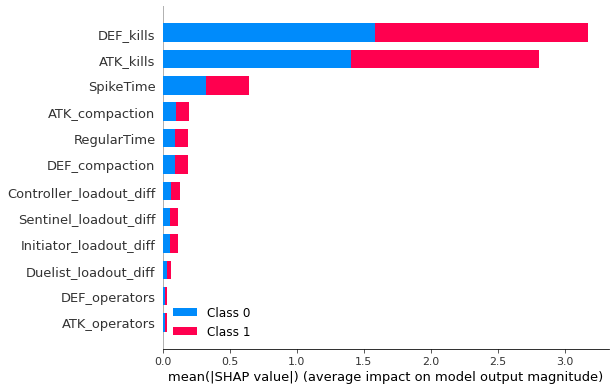

In [4]:
shap.summary_plot(shap_values, x)

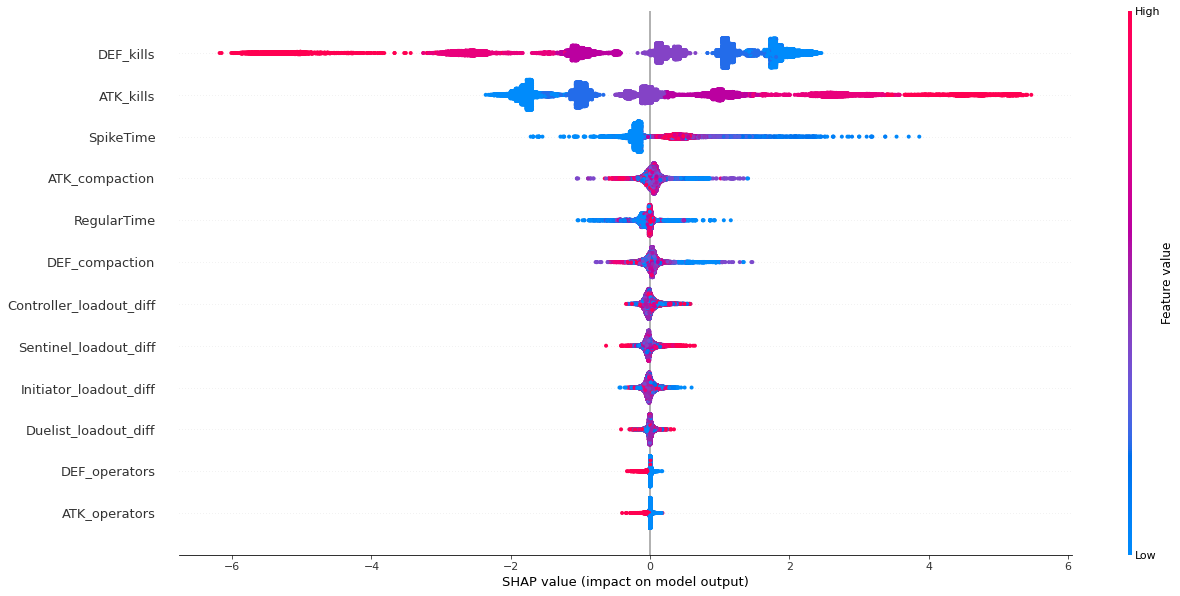

In [5]:
shap.summary_plot(shap_values[1], x, plot_size=(20,10))

In [19]:
shap_values[1]

array([[ 0.00960498, -0.16659676,  0.02673054, ..., -0.00999957,
        -0.08661233, -0.01154786],
       [-0.02392325, -0.14852368,  0.00855262, ...,  0.00257264,
        -0.07018221,  0.0087521 ],
       [-0.03456988, -0.15600951,  0.00745117, ...,  0.00868116,
        -0.0543753 ,  0.01523913],
       ...,
       [-0.11035618,  0.76597478,  0.00456982, ..., -0.02281858,
         0.02330677,  0.03300367],
       [-0.12988226,  0.74931163,  0.0047366 , ...,  0.03927072,
        -0.00354653,  0.04580839],
       [-0.08849618,  0.67831307,  0.00356784, ...,  0.05427789,
         0.04688543,  0.00952881]])

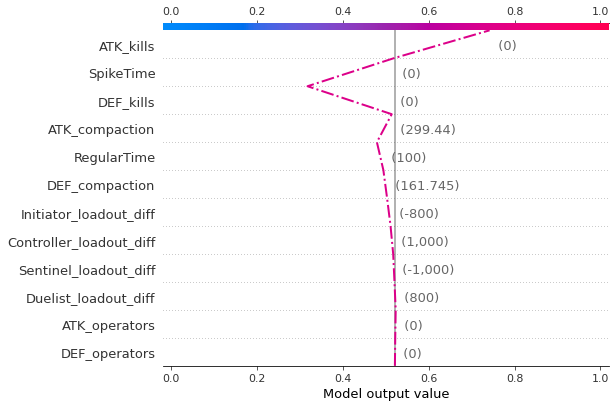

In [20]:
shap.decision_plot(explainer.expected_value[1], shap_values[1][500], x, link="logit", highlight=0)

In [ ]:
shap.dependence_plot("Loadout_diff", shap_values[0], x)

In [ ]:
shap.dependence_plot("DEF_operators", shap_values[0], x)

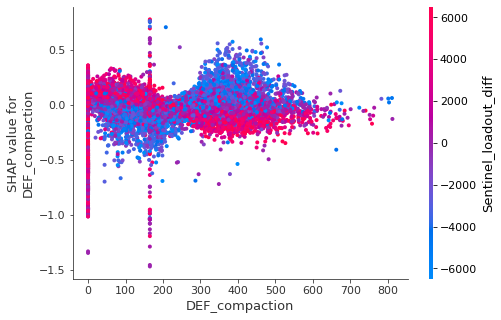

In [6]:
shap.dependence_plot("DEF_compaction", shap_values[0], x)

In [ ]:
shap.dependence_plot("atkCompaction", shap_values[0], x)

In [ ]:
shap.dependence_plot("SpikeTime", shap_values[0], x)

In [ ]:
shap.dependence_plot("RegularTime", shap_values[0], x)

In [ ]:
shap.dependence_plot("ATK_Sentinel", shap_values[0], x)

In [ ]:
x.iloc[450]

In [ ]:
shap.decision_plot(explainer.expected_value[1], shap_values[1][449], x, link="logit", highlight=0)

In [ ]:
shap.initjs()
columIndex= 29
shap.force_plot(explainer.expected_value[1], shap_values[1][columIndex,:], x.iloc[columIndex,:], link="logit")

In [ ]:
shap.force_plot(explainer.expected_value[1], shap_values[0][:20], x)